In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [87]:
def read_sampels(file_names):
    samples = list()
    rows = list()

    for i in range (len (file_names)):
        samples.append(pd.read_excel(file_names[i], usecols= "C,D,F,I,K,L,M,O"))
        rows.append(len(samples[i]))
    
    return [samples, rows]

In [88]:
def LevelCheck (level, T, F):
    if level == 2:
        if (T+F) == 2:
            return 1
        else:
            return False
    elif level == 4:
        if (T+F) == 3:
            return 2
        else:
            return False
    elif level == 7:
        if (T+F) == 4:
            return 3
        else:
            return False
    elif level == 8:
        if (T+F) == 4:
            return 4
        else:
            return False
    elif level == 11:
        if (T+F) == 5:
            return 5
        else:
            return False

In [89]:
def seperate_students_Data(sample, rows):
    Students = []
    i=0
    while i in range(rows):
        ID = sample.iloc[i, 2]
        SameStudent = 1
        EachStudent = []
        while SameStudent:
            EachStudent.append([sample.iloc[i, 1], sample.iloc[i, 4], sample.iloc[i, 5]])
            i += 1
            if i == rows :
                break
            SameStudent = (sample.iloc[i, 2] == ID)
            
        
        Students.append(EachStudent)

    return Students

In [90]:
def seperating_students(sample, rows):
    Students = seperate_students_Data(sample, rows)
    number_of_students = len(Students)
    return[Students, number_of_students]

In [91]:
def Acc_per_level_for_each(StudentSample):
    row = len(StudentSample)

    LevelsAccSum = np.zeros(5)  #the sum of accuracy for each level
    LevelNum = np.zeros(5)      #for counting each level's num

    for i in range(row):
        level = StudentSample[i][0]
        T = StudentSample[i][1]
        F = StudentSample[i][2]

        LIndex = LevelCheck(level, T, F)  

        if LIndex:
            Acc = T / (T+F)
            LevelNum[(LIndex-1)] += 1  
            LevelsAccSum[(LIndex-1)] += Acc

    LevelsAcc = [LevelsAccSum[i]/LevelNum[i] if LevelNum[i] else 0 for i in range(5)]
    
    return LevelsAcc

In [92]:
def Accs_of_students(Students, number_of_students):
    Accs_of_stds = []
    for i in range(number_of_students):
        Accs_of_stds.append(Acc_per_level_for_each(Students[i]))

    return Accs_of_stds

In [93]:
def plot_for_one_age(StdsAccs, sample_name):
    
    title = sample_name[7:13]
    levels = [2, 4, 7, 8, 11]

    for i in range(len(StdsAccs)):
        plt.plot(levels, StdsAccs[i])
    plt.xticks([2, 4, 7, 8, 11])
    plt.xlabel("level")
    plt.ylabel("accuracy")
    plt.title(title)
    plt.show()

In [94]:
def run_for_one_file(sample, row, name):
    [Students, number_of_students] = seperating_students(sample, row)

    Accs = Accs_of_students(Students, number_of_students)

    levels = [2, 4, 7, 8, 11]

    plot_for_one_age(Accs, name)

In [95]:
def run_for_all_files(file_names):
    [samples, rows] = read_sampels(file_names)
    for i in range(len(samples)):
        run_for_one_file(samples[i], rows[i], file_names[i])

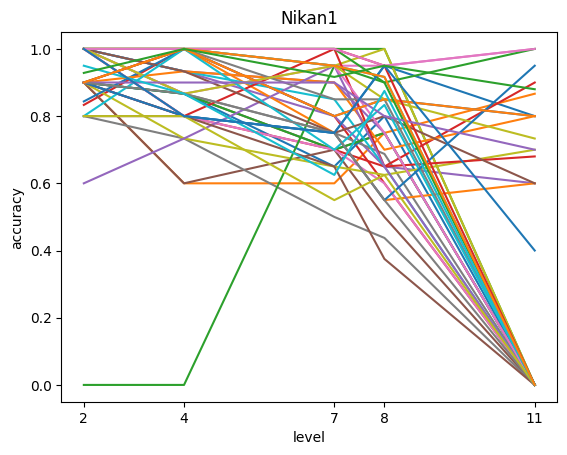

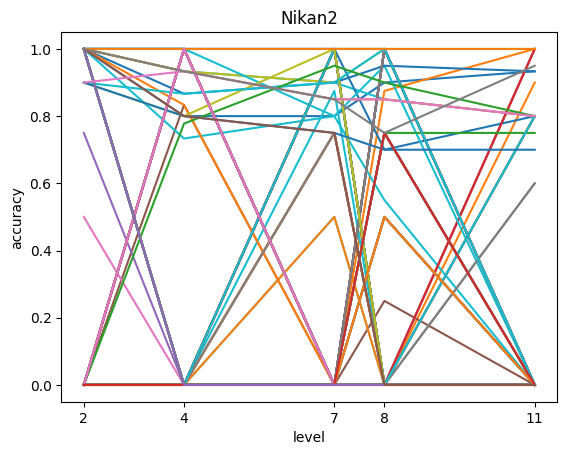

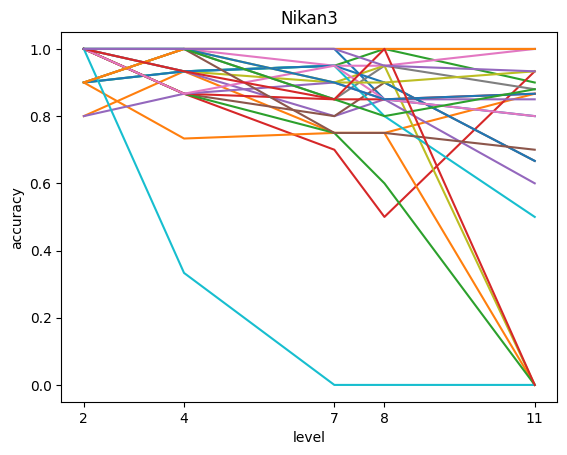

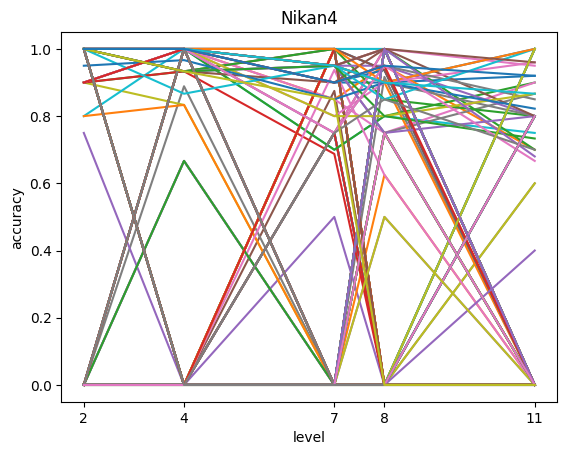

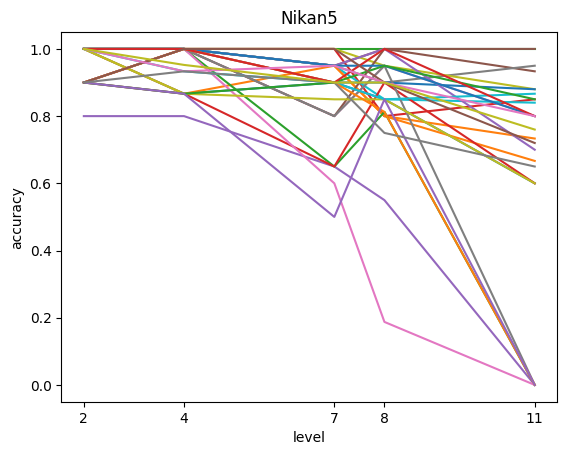

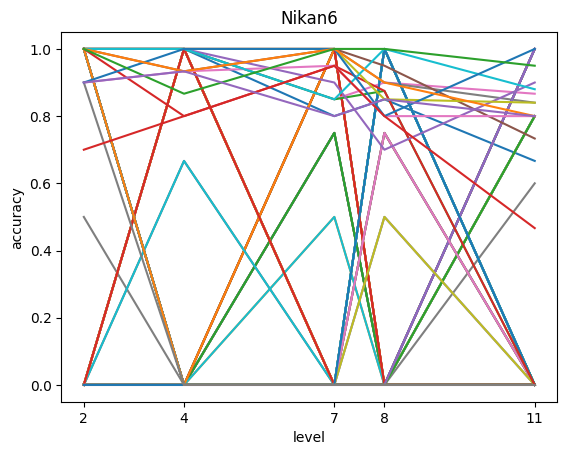

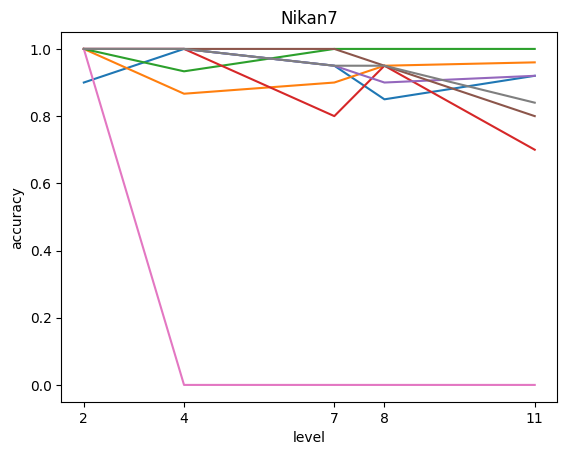

In [96]:
file_names = ['Clouds-Nikan1.xlsx',
              'Clouds-Nikan2.xlsx',
              'Clouds-Nikan3.xlsx',
              'Clouds-Nikan4.xlsx',
              'Clouds-Nikan5.xlsx',
              'Clouds-Nikan6.xlsx',
              'Clouds-Nikan7.xlsx']

run_for_all_files(file_names)